# Tutorial 0: Overview of built-in examples

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn

MAVE-NN comes with built-in demos, tutorials, models, and datasets. Tutorials are provided in the form of Jupyter notebooks (like this one). To get a list of tutorials notebooks, as well as their locations on your local machine, import `mavenn` and execute the following:

In [2]:
mavenn.list_tutorials()

The following MAVE-NN tutorials are available (as Jupyter notebooks):

	tutorial_0_built-in_examples.ipynb
	tutorial_1_mpsa_analysis.ipynb
	tutorial_2_recover_true_GB1_model_from_simulated_data.ipynb

These tutorial files are located in

	/Users/jkinney/github/mavenn/mavenn/examples/tutorials/



A list of example datasets included within mavenn can be seen by execute the following:

In [3]:
mavenn.load_example_dataset()

Please enter a dataset name. Valid choices are:
"ace2rbd"
"gb1"
"mpsa"
"mpsa_replicate"
"sortseq"
"sortseq_crp-wt"
"sortseq_full-0"
"sortseq_full-150"
"sortseq_full-500"
"sortseq_full-wt"
"sortseq_rnap-wt"


These string values represent different multiplex assays (see references) and entering any of these names into the `load_example_dataset` function returns a pandas dataframe containing sequences and their associated measurements. For example, using 'mpsa' as the input string loads the massively parallel splicing assay (MPSA) dataset reported by Wong et al., 2018.

In [4]:
mpsa_df = mavenn.load_example_dataset(name='mpsa')
mpsa_df.head()

,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,315,7,-0.587914,AGUGUGCAA
2,test,193,15,-0.074999,UUCGCGCCA
3,validation,27,0,-0.438475,UAAGCUUUU
4,training,130,2,-0.631467,AUGGUCGGG


A value of `True` in the column `training_set` indicates rows that were used to train MAVE-NN models. All other rows indicate held-out test data.

This mpsa dataframe show above consists of continuous measurement values  $y$  and is appropriate for use with global epistasis regression in MAVE-NN. The values in the column d$y$ indicate the SEM values. Using 'name=gb1' as the string value in `load_example_dataset` yields a similar dataframe. Using 'sortseq' as the dataset name yields a dataset appropiate for measurement process agnostic (MPA) regression in MAVE-NN:

In [5]:
sortseq_df = mavenn.load_example_dataset('sortseq')
sortseq_df.head()

,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,test,0,0,0,0,0,0,0,0,1,0,GGCTTTACACTTTAAGCTGCCGCATCGTATGTTATGTGG
1,training,0,1,0,0,0,0,0,0,0,0,GGCTATACATTTTATGTTTCCGGGTCGTATTTTGTGTGG
2,training,0,0,0,0,0,0,0,0,1,0,GGCTTTACATTTTATGCTTCCTTCACGTATGTTGTGTCT
3,test,0,0,0,0,0,1,0,0,0,0,GGCATTACTCTTTGTGCTTCCGGCTCGTATGTTGTGTGG
4,test,0,0,0,0,0,0,0,1,0,0,GACTTTTCAATTTATGCTTTCAGTTGGTATGTTGTGTAG


In this dataframe, ct_i indicates the counts in bin i, where i indexes the bins. 

The `load_example_model` method allows for pretrained MAVE-NN models to be loaded and subsequently used on the above example datasets. To see a list of models that be loaded with MAVE-NN, execute the following:

In [6]:
mavenn.load_example_model()

Please enter a model name. Valid choices are:
"gb1_ge_additive"
"gb1_ge_additive_homogaussian"
"gb1_ge_blackbox"
"mpsa_ge_additive"
"mpsa_ge_blackbox"
"mpsa_ge_neighbor"
"mpsa_ge_pairwise"
"sortseq_full-wt_mpa_additive"
"sortseq_full-wt_mpa_blackbox"
"sortseq_mpa_additive"
"sortseq_mpa_blackbox"


We now load the mpsa pairwise example model and use it in conjunction with the mpsa dataset loaded above. 

In [7]:
mpsa_pairwise = mavenn.load_example_model(name='mpsa_ge_pairwise')

Model loaded from these files:
	/Users/jkinney/github/mavenn/mavenn/examples/models/mpsa_ge_pairwise.pickle
	/Users/jkinney/github/mavenn/mavenn/examples/models/mpsa_ge_pairwise.h5


In [8]:
mpsa_pairwise.regression_type

'GE'

The `mpsa_pairwise` variable contain the MAVE-NN model objects, from which a number of helpful attributes and functions can be accessed. E.g., the function `x_to_yhat()` can be used to make predictions on input sequences. We first extract test sequences to evaluate various MAVE-NN model methods. 

In [9]:
# indices of training examples
i_training = mpsa_df['set']=='training'

# get test examples.
mpsa_test_df = mpsa_df[~i_training]

print('Test mpsa values:')
mpsa_test_df.head()

Test mpsa values:


,set,tot_ct,ex_ct,y,x
2,test,193,15,-0.074999,UUCGCGCCA
3,validation,27,0,-0.438475,UAAGCUUUU
7,test,216,6,-0.482679,GGUGUCUGU
10,validation,14,0,-0.167408,CAUGCAGCU
17,test,539,19,-0.422681,UUAGCUGGA


N = 12,268 observations set as training data.
Using 20.2% for validation.
Data shuffled.
Time to set data: 0.428 sec.


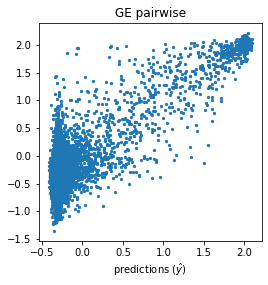

In [10]:
x = mpsa_test_df['x'].values
y = mpsa_test_df['y'].values

mpsa_pairwise.set_data(x=mpsa_test_df['x'],
                       y=mpsa_test_df['y'])

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(mpsa_pairwise.x_to_yhat(x),y,s=5)
ax.set_title(mpsa_pairwise.regression_type+' '+mpsa_pairwise.gpmap_type)
ax.set_xlabel('predictions ($\hat{y}$)')
plt.show()

The function `x_to_phi` can be used to obtain the latent phenotype $\phi$ from sequences. Additionally, we can evaluate the function on a grid `phi_to_yhat` and plot it against $\phi$.

In [11]:
phi_pairwise = mpsa_pairwise.x_to_phi(x)
phi_pairwise_lim = [min(phi_pairwise)-.5, max(phi_pairwise)+.5]
phi_pairwise_grid = np.linspace(phi_pairwise_lim[0], phi_pairwise_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_pairwise_grid = mpsa_pairwise.phi_to_yhat(phi_pairwise_grid)

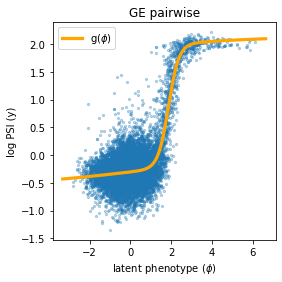

In [12]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(phi_pairwise,y,s=5,alpha=0.3)
ax.plot(phi_pairwise_grid,yhat_pairwise_grid,color='orange',lw=3.2,label='g($\phi$)')
ax.set_title(mpsa_pairwise.regression_type+' '+mpsa_pairwise.gpmap_type)
ax.set_ylabel('log PSI (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.legend()

plt.show()

Demos, on the other, hand are self-contained Python scripts that can be executed by calling `mavenn.run_demo()`. To get a list of demo names, execute: 

In [13]:
mavenn.run_demo()

To run a demo, execute

	>>> mavenn.run_demo(name)

where 'name' is one of the following strings:

	1. "gb1_ge_evaluation"
	2. "mpsa_ge_training"
	3. "sortseq_mpa_visualization"

Python code for each demo is located in

	/Users/jkinney/github/mavenn/mavenn/examples/demos/



['gb1_ge_evaluation', 'mpsa_ge_training', 'sortseq_mpa_visualization']

The `"gb1_ge_evaluation"` demo illustrates an additive G-P map, along with a heteroskedastic Gaussian GE measurement process, fit to data from a deep mutational scanning (DMS) experiment on the protein GB1 performed by Olson et al., 2014. To see the code for this demo, set `print_code=True`.

Running /Users/jkinney/github/mavenn/mavenn/examples/demos/gb1_ge_evaluation.py...
Using mavenn at: /Users/jkinney/github/mavenn/mavenn
Model loaded from these files:
	/Users/jkinney/github/mavenn/mavenn/examples/models/gb1_ge_additive.pickle
	/Users/jkinney/github/mavenn/mavenn/examples/models/gb1_ge_additive.h5


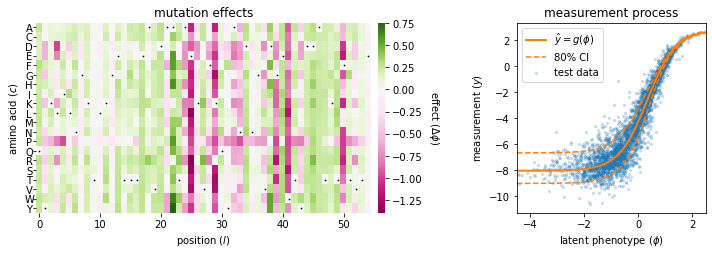

Done!


In [14]:
mavenn.run_demo("gb1_ge_evaluation", print_code=False)

The `"sortseq_mpa_visualization"` demo illustrates an additive G-P map, along with an MPA measurement process, fit to data from a sort-seq massively parallel reporter assay (MPRA) performed by Kinney et al., 2010. 

Running /Users/jkinney/github/mavenn/mavenn/examples/demos/sortseq_mpa_visualization.py...
Using mavenn at: /Users/jkinney/github/mavenn/mavenn
Model loaded from these files:
	/Users/jkinney/github/mavenn/mavenn/examples/models/sortseq_full-wt_mpa_additive.pickle
	/Users/jkinney/github/mavenn/mavenn/examples/models/sortseq_full-wt_mpa_additive.h5


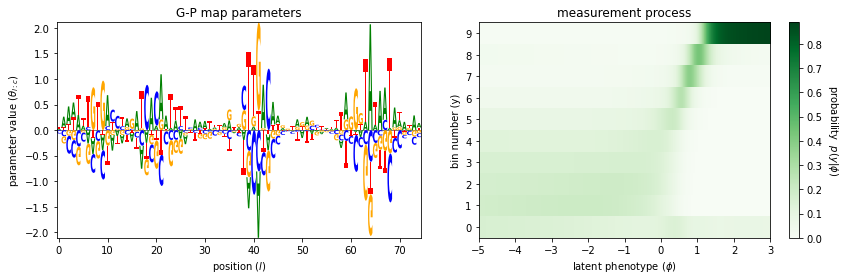

Done!


In [15]:
mavenn.run_demo("sortseq_mpa_visualization", print_code=False)

The `"mpsa_ge_training"` demo trains a pairwise G-P map, along with a homoskedastic Gaussian measurement process, on data from a massively parallel splicing assay (MPSA) reported by Wong et al., 2018. This training takes ~20 seconds on a standard laptop.

Running /Users/jkinney/github/mavenn/mavenn/examples/demos/mpsa_ge_training.py...
Using mavenn at: /Users/jkinney/github/mavenn/mavenn
N = 24,234 observations set as training data.
Using 20.2% for validation.
Data shuffled.
Time to set data: 0.475 sec.
 
LSMR            Least-squares solution of  Ax = b

The matrix A has 19330 rows and 36 columns
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =       36

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.384e+02  4.580e+03   1.0e+00  2.4e-01
     1 -2.80282e-03  1.266e+02  1.851e+03   9.1e-01  1.8e-01  8.1e+01  1.0e+00
     2 -1.68221e-04  1.259e+02  1.357e+03   9.1e-01  5.8e-02  1.9e+02  1.7e+00
     3 -9.13340e-04  1.247e+02  6.968e+01   9.0e-01  2.0e-03  2.8e+02  2.5e+00
     4 -1.55483e-03  1.247e+02  2.968e+00   9.0e-01  8.3e-05  2.9e+02  3.1e+00
     5 -1.53608e-03  1.247e+02  2.470e-01   9.0e-01  6.7e-06  2.9

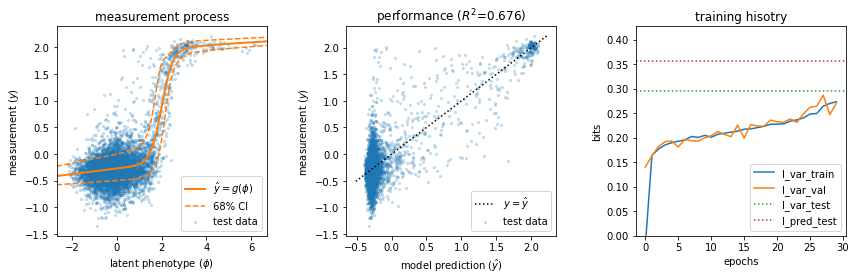

Done!


In [16]:
mavenn.run_demo("mpsa_ge_training", print_code=False)

**References**

1. Olson, C., Wu, N., Sun, R. (2014). A comprehensive biophysical description of pairwise epistasis throughout an entire protein domain. Current biology : CB  24(22), 2643 - 2651. https://dx.doi.org/10.1016/j.cub.2014.09.072

1. Kinney, J., Murugan, A., Callan, C., Cox, E. (2010). Using deep sequencing to characterize the biophysical mechanism of a transcriptional regulatory sequence Proceedings of the National Academy of Sciences  107(20), 9158-9163. https://dx.doi.org/10.1073/pnas.1004290107

1. Wong, M., Kinney, J., Krainer, A. (2018). Quantitative Activity Profile and Context Dependence of All Human 5' Splice Sites. Molecular cell  71(6), 1012-1026.e3. https://dx.doi.org/10.1016/j.molcel.2018.07.033